In [4]:
pip install --use-deprecated=legacy-resolver pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
pandas-profiling 3.2.0 requires PyYAML>=5.0.0, but you have pyyaml 3.13 which is incompatible.
pandas-profiling 3.2.0 requires requests>=2.24.0, but you have requests 2.23.0 which is incompatible.
flask-simplelogin 0.1.1 requires click<9.0.0,>=8.0.1, but you have click 7.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
autoviz 0.1.42 requires matplotlib>=3.3.3, but you have matplot

In [1]:
from pycaret.classification import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
URL='https://raw.githubusercontent.com/sparshba/EMPLOYEE-ATTRITION/main/Employee-turnover.csv'
df=pd.read_csv(URL,encoding='unicode_escape')

In [3]:
df.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),Job Involvement,Job Level,Job Satisfaction,Monthly Income (USD),Salary Hike (%),Stock Option Level,Over Time,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,1,High,2,Very High,5993,11,0,Yes,2,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,8,Medium,2,Medium,5130,23,1,No,1,10,10,7,1,7,High,3,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,2,Medium,1,High,2090,15,0,Yes,6,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,3,High,1,High,2909,11,0,Yes,1,8,8,7,3,0,Very High,3,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,2,High,1,Medium,3468,12,1,No,9,6,2,2,2,2,Low,3,Better,Very High,No


In [4]:
print(df.shape)

(1470, 29)


In [5]:
df.describe()

,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year
count,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1.0,1024.865306,36.923810,9.192517,2.063946,6502.931293,14.951701,0.793878,2.689116,11.279592,7.008163,4.229252,2.187755,4.123129,2.799320
std,0.0,602.024335,9.135373,8.106864,1.106940,4707.956783,3.533904,0.852077,2.494231,7.780782,6.126525,3.623137,3.222430,3.568136,1.289271
min,1.0,1.000000,18.000000,1.000000,1.000000,1009.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,491.250000,30.000000,2.000000,1.000000,2911.000000,12.000000,0.000000,1.000000,6.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,1.0,1020.500000,36.000000,7.000000,2.000000,4919.000000,14.000000,1.000000,2.000000,10.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,1.0,1555.750000,43.000000,14.000000,3.000000,8379.000000,17.000000,1.000000,4.000000,15.000000,9.000000,7.000000,3.000000,7.000000,3.000000
max,1.0,2068.000000,60.000000,29.000000,5.000000,19999.000000,25.000000,3.000000,9.000000,40.000000,40.000000,18.000000,15.000000,17.000000,6.000000


In [6]:
df.isnull().sum()

Employee Count                0
Employee ID                   0
Department                    0
Job Role                      0
Gender                        0
Age                           0
Marital Status                0
Education                     0
Education Field               0
Business Travel               0
Distance From Home (kms)      0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income (USD)          0
Salary Hike (%)               0
Stock Option Level            0
Over Time                     0
No. of Companies Worked       0
Total Working Years           0
Years At Company              0
Years In Current Role         0
Years Since Last Promotion    0
Years With Curr Manager       0
Environment Satisfaction      0
Training Times Last Year      0
Work Life Balance             0
Relationship Satisfaction     0
Attrition (Yes/No)            0
dtype: int64

In [7]:
print(type(df))
#data.columns = data.columns.str.replace('Attrition (Yes/No)', 'Attrition')

<class 'pandas.core.frame.DataFrame'>


In [8]:
attrition_count = pd.DataFrame(df['Attrition (Yes/No)'].value_counts())
attrition_count

,Attrition (Yes/No)
No,1233
Yes,237


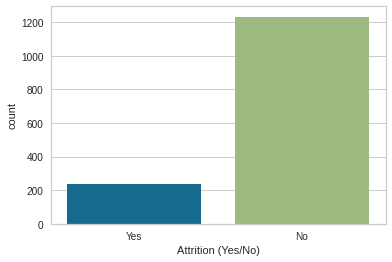

In [13]:
x=df['Attrition (Yes/No)']
sns.countplot(x)

In [14]:
#df['Attrition (Yes/No)']
df = df.replace({'Attrition (Yes/No)': {'Yes': 1, 
                                'No': 0}})
df.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),Job Involvement,Job Level,Job Satisfaction,Monthly Income (USD),Salary Hike (%),Stock Option Level,Over Time,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,1,High,2,Very High,5993,11,0,Yes,2,8,6,4,0,5,Medium,0,Bad,Low,1
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,8,Medium,2,Medium,5130,23,1,No,1,10,10,7,1,7,High,3,Better,Very High,0
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,2,Medium,1,High,2090,15,0,Yes,6,7,0,0,0,0,Low,3,Bad,Medium,1
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,3,High,1,High,2909,11,0,Yes,1,8,8,7,3,0,Very High,3,Better,High,0
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,2,High,1,Medium,3468,12,1,No,9,6,2,2,2,2,Low,3,Better,Very High,0


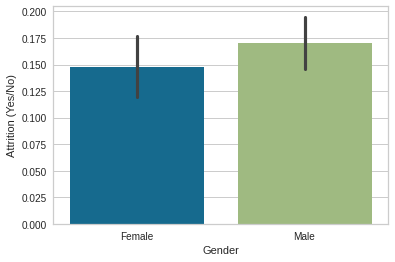

In [15]:
sns.barplot(x='Gender',y='Attrition (Yes/No)',data=df)

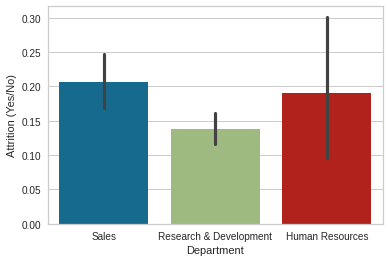

In [16]:
sns.barplot(x='Department',y='Attrition (Yes/No)',data=df)

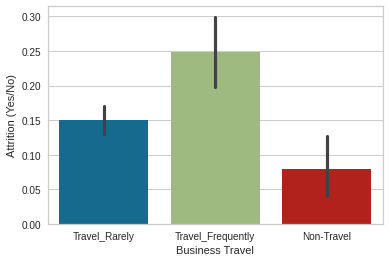

In [17]:
sns.barplot(x='Business Travel',y='Attrition (Yes/No)',data=df)

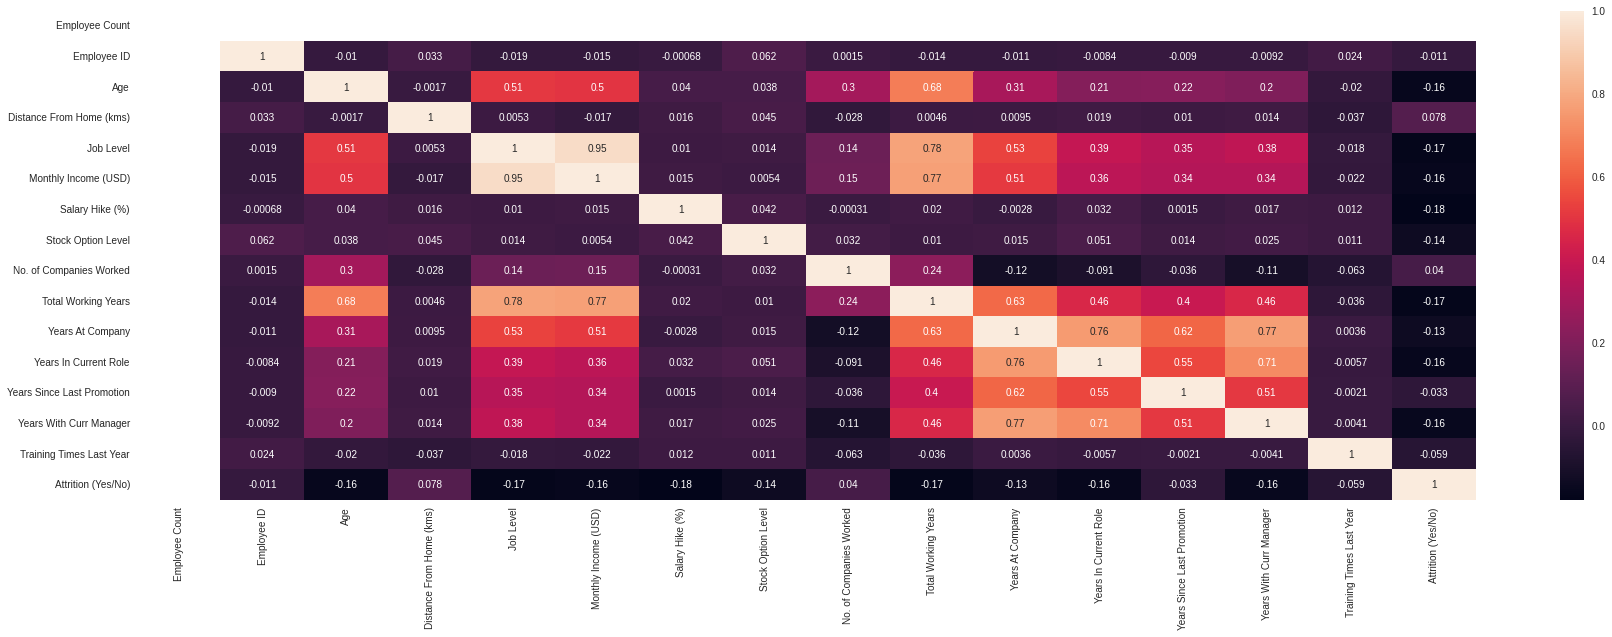

In [18]:
plt.figure(figsize = (30,9))
sns.heatmap(df.corr(),annot=True)

In [19]:
df.drop(['Age','Job Level'],axis=1)

,Employee Count,Employee ID,Department,Job Role,Gender,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),Job Involvement,Job Satisfaction,Monthly Income (USD),Salary Hike (%),Stock Option Level,Over Time,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,Single,College,Life Sciences,Travel_Rarely,1,High,Very High,5993,11,0,Yes,2,8,6,4,0,5,Medium,0,Bad,Low,1
1,1,2,Research & Development,Research Scientist,Male,Married,Below College,Life Sciences,Travel_Frequently,8,Medium,Medium,5130,23,1,No,1,10,10,7,1,7,High,3,Better,Very High,0
2,1,4,Research & Development,Laboratory Technician,Male,Single,College,Other,Travel_Rarely,2,Medium,High,2090,15,0,Yes,6,7,0,0,0,0,Low,3,Bad,Medium,1
3,1,5,Research & Development,Research Scientist,Female,Married,Master,Life Sciences,Travel_Frequently,3,High,High,2909,11,0,Yes,1,8,8,7,3,0,Very High,3,Better,High,0
4,1,7,Research & Development,Laboratory Technician,Male,Married,Below College,Medical,Travel_Rarely,2,High,Medium,3468,12,1,No,9,6,2,2,2,2,Low,3,Better,Very High,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,2061,Research & Development,Laboratory Technician,Male,Married,College,Medical,Travel_Frequently,23,Very High,Very High,2571,17,1,No,4,17,5,2,0,3,High,3,Better,High,0
1466,1,2062,Research & Development,Healthcare Representative,Male,Married,Below College,Medical,Travel_Rarely,6,Medium,Low,9991,15,1,No,4,9,7,7,1,7,Very High,5,Better,Low,0
1467,1,2064,Research & Development,Manufacturing Director,Male,Married,Bachelor,Life Sciences,Travel_Rarely,4,Very High,Medium,6142,20,1,Yes,1,6,6,2,0,3,Medium,0,Better,Medium,0
1468,1,2065,Sales,Sales Executive,Male,Married,Bachelor,Medical,Travel_Frequently,2,Medium,Medium,5390,14,0,No,2,17,9,6,0,8,Very High,3,Good,Very High,0


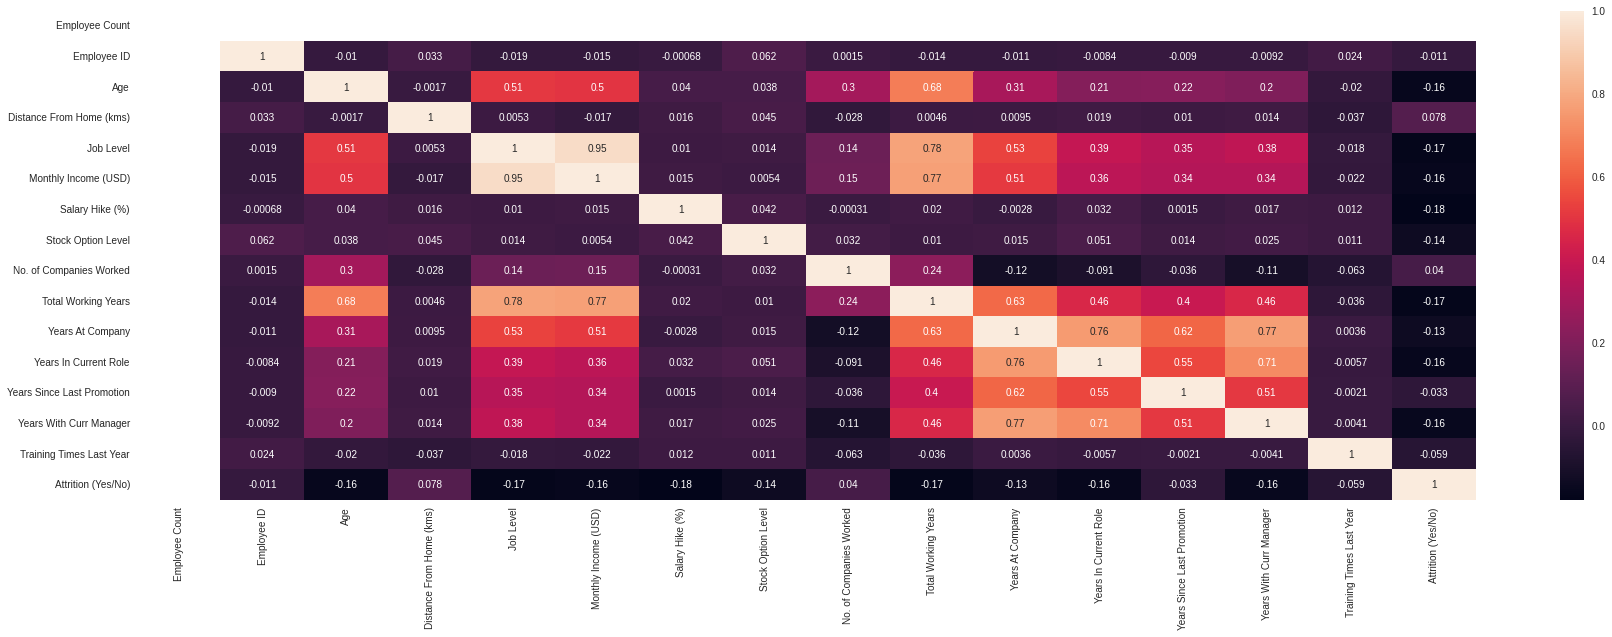

In [20]:
plt.figure(figsize = (30,9))
sns.heatmap(df.corr(),annot=True)

In [21]:
cat_col = df.select_dtypes(exclude=np.number).columns
num_col = df.select_dtypes(include=np.number).columns
for i in cat_col:
    print(f'\n========= {i} \n')
    print(df[i].value_counts())


========= Department 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

========= Job Role 

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: Job Role, dtype: int64

========= Gender 

Male      882
Female    588
Name: Gender, dtype: int64

========= Marital Status 

Married     673
Single      470
Divorced    327
Name: Marital Status, dtype: int64

========= Education 

Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64

========= Education Field 

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resource

In [22]:
#Creating of Dummy variables for categorial variables
encoded_cat_col = pd.get_dummies(df[cat_col], drop_first=True)
final_model = pd.concat([df[num_col],encoded_cat_col],axis=1)
final_model.columns

Index(['Employee Count', 'Employee ID', 'Age', 'Distance From Home (kms)',
       'Job Level', 'Monthly Income (USD)', 'Salary Hike (%)',
       'Stock Option Level', 'No. of Companies Worked', 'Total Working Years',
       'Years At Company', 'Years In Current Role',
       'Years Since Last Promotion', 'Years With Curr Manager',
       'Training Times Last Year', 'Attrition (Yes/No)',
       'Department_Research & Development', 'Department_Sales',
       'Job Role_Human Resources', 'Job Role_Laboratory Technician',
       'Job Role_Manager', 'Job Role_Manufacturing Director',
       'Job Role_Research Director', 'Job Role_Research Scientist',
       'Job Role_Sales Executive', 'Job Role_Sales Representative',
       'Gender_Male', 'Marital Status_Married', 'Marital Status_Single',
       'Education_Below College', 'Education_College', 'Education_Doctor',
       'Education_Master', 'Education Field_Life Sciences',
       'Education Field_Marketing', 'Education Field_Medical',
       '

In [23]:
final_model.head()

,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year,Attrition (Yes/No),Department_Research & Development,Department_Sales,Job Role_Human Resources,Job Role_Laboratory Technician,Job Role_Manager,Job Role_Manufacturing Director,Job Role_Research Director,Job Role_Research Scientist,Job Role_Sales Executive,Job Role_Sales Representative,Gender_Male,Marital Status_Married,Marital Status_Single,Education_Below College,Education_College,Education_Doctor,Education_Master,Education Field_Life Sciences,Education Field_Marketing,Education Field_Medical,Education Field_Other,Education Field_Technical Degree,Business Travel_Travel_Frequently,Business Travel_Travel_Rarely,Job Involvement_Low,Job Involvement_Medium,Job Involvement_Very High,Job Satisfaction_Low,Job Satisfaction_Medium,Job Satisfaction_Very High,Over Time_Yes,Environment Satisfaction_Low,Environment Satisfaction_Medium,Environment Satisfaction_Very High,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High
0,1,1,41,1,2,5993,11,0,2,8,6,4,0,5,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0
1,1,2,49,8,2,5130,23,1,1,10,10,7,1,7,3,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1,4,37,2,1,2090,15,0,6,7,0,0,0,0,3,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,1,5,33,3,1,2909,11,0,1,8,8,7,3,0,3,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
4,1,7,27,2,1,3468,12,1,9,6,2,2,2,2,3,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1


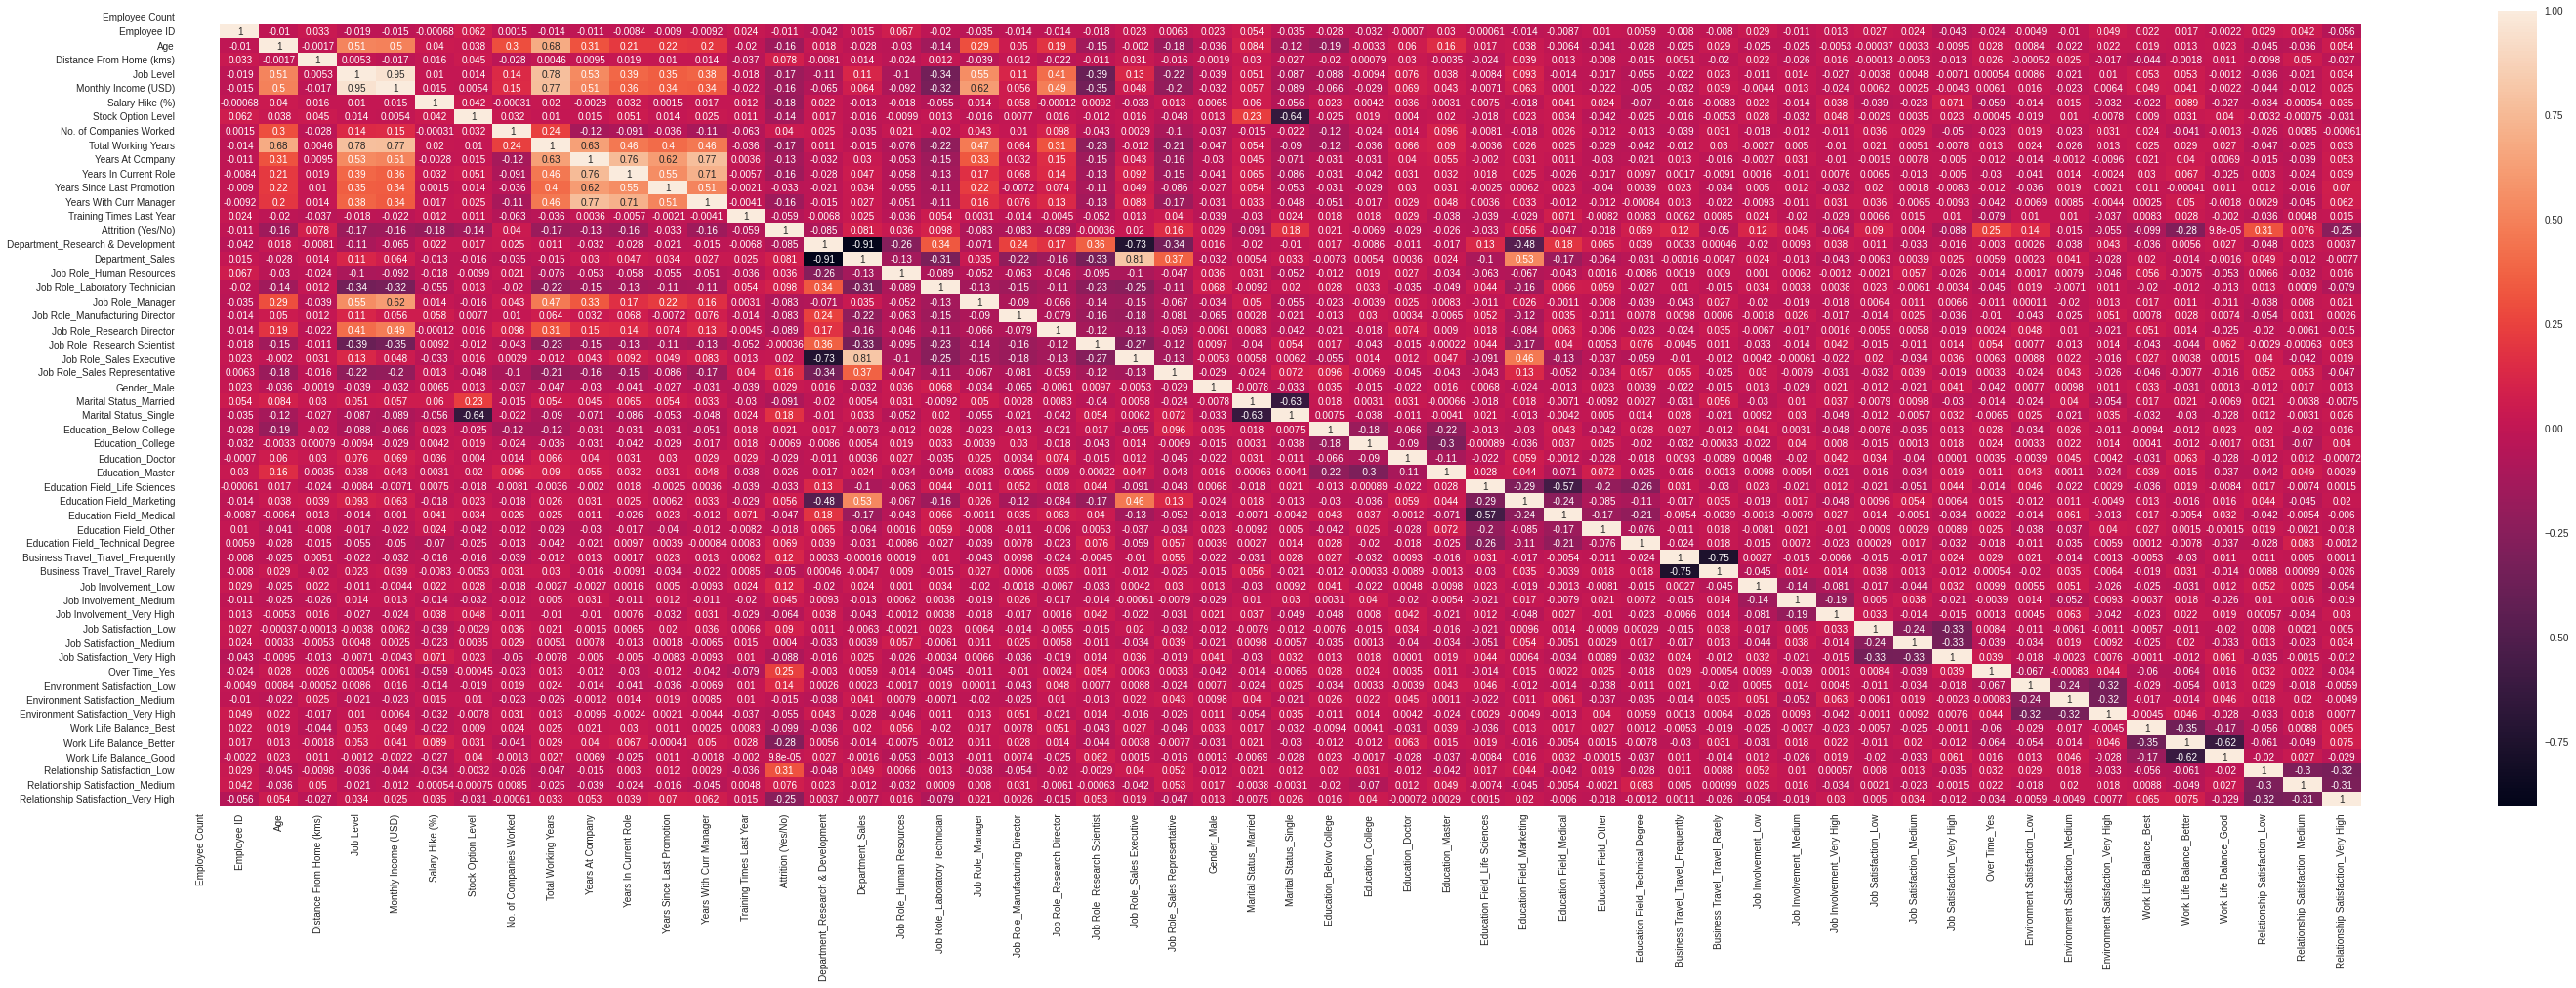

In [24]:
plt.figure(figsize = (50,15))
sns.heatmap(final_model.corr(),annot=True)

<h1>MODEL BUILDING</h1>

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x  = final_model.drop(['Attrition (Yes/No)'], axis = 1)
y = df['Attrition (Yes/No)']

In [27]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [28]:
x_train.head()

,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year,Department_Research & Development,Department_Sales,Job Role_Human Resources,Job Role_Laboratory Technician,Job Role_Manager,Job Role_Manufacturing Director,Job Role_Research Director,Job Role_Research Scientist,Job Role_Sales Executive,Job Role_Sales Representative,Gender_Male,Marital Status_Married,Marital Status_Single,Education_Below College,Education_College,Education_Doctor,Education_Master,Education Field_Life Sciences,Education Field_Marketing,Education Field_Medical,Education Field_Other,Education Field_Technical Degree,Business Travel_Travel_Frequently,Business Travel_Travel_Rarely,Job Involvement_Low,Job Involvement_Medium,Job Involvement_Very High,Job Satisfaction_Low,Job Satisfaction_Medium,Job Satisfaction_Very High,Over Time_Yes,Environment Satisfaction_Low,Environment Satisfaction_Medium,Environment Satisfaction_Very High,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High
338,1,456,30,5,2,6118,13,3,1,10,10,9,1,2,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
363,1,485,33,5,1,2851,13,0,1,1,1,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
759,1,1049,45,24,1,2177,16,0,1,6,6,3,0,4,3,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
793,1,1102,28,15,1,2207,16,1,1,4,4,2,2,2,5,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
581,1,806,30,1,1,3833,21,2,3,7,2,2,0,2,2,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


<h2>RANDOM FOREST</h2>

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini')


In [30]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
rf.score(x_train, y_train)

1.0

<h2>Predicting for x_test</h2>

In [32]:
pred = rf.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test, pred)

0.8866213151927438

<h1>PYCARET</h1>

In [35]:
x_train['Attrition (Yes/No)']=y_train
x_train.head()

,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year,Department_Research & Development,Department_Sales,Job Role_Human Resources,Job Role_Laboratory Technician,Job Role_Manager,Job Role_Manufacturing Director,Job Role_Research Director,Job Role_Research Scientist,Job Role_Sales Executive,Job Role_Sales Representative,Gender_Male,Marital Status_Married,Marital Status_Single,Education_Below College,Education_College,Education_Doctor,Education_Master,Education Field_Life Sciences,Education Field_Marketing,Education Field_Medical,Education Field_Other,Education Field_Technical Degree,Business Travel_Travel_Frequently,Business Travel_Travel_Rarely,Job Involvement_Low,Job Involvement_Medium,Job Involvement_Very High,Job Satisfaction_Low,Job Satisfaction_Medium,Job Satisfaction_Very High,Over Time_Yes,Environment Satisfaction_Low,Environment Satisfaction_Medium,Environment Satisfaction_Very High,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High,Attrition (Yes/No)
338,1,456,30,5,2,6118,13,3,1,10,10,9,1,2,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
363,1,485,33,5,1,2851,13,0,1,1,1,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1
759,1,1049,45,24,1,2177,16,0,1,6,6,3,0,4,3,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
793,1,1102,28,15,1,2207,16,1,1,4,4,2,2,2,5,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
581,1,806,30,1,1,3833,21,2,3,7,2,2,0,2,2,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [36]:
x_test['Attrition (Yes/No)']=y_test
x_test.head()

,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year,Department_Research & Development,Department_Sales,Job Role_Human Resources,Job Role_Laboratory Technician,Job Role_Manager,Job Role_Manufacturing Director,Job Role_Research Director,Job Role_Research Scientist,Job Role_Sales Executive,Job Role_Sales Representative,Gender_Male,Marital Status_Married,Marital Status_Single,Education_Below College,Education_College,Education_Doctor,Education_Master,Education Field_Life Sciences,Education Field_Marketing,Education Field_Medical,Education Field_Other,Education Field_Technical Degree,Business Travel_Travel_Frequently,Business Travel_Travel_Rarely,Job Involvement_Low,Job Involvement_Medium,Job Involvement_Very High,Job Satisfaction_Low,Job Satisfaction_Medium,Job Satisfaction_Very High,Over Time_Yes,Environment Satisfaction_Low,Environment Satisfaction_Medium,Environment Satisfaction_Very High,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High,Attrition (Yes/No)
442,1,592,36,10,3,9980,14,0,1,10,10,3,9,7,3,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1091,1,1545,33,25,2,4320,13,0,1,5,5,3,0,2,2,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
981,1,1380,35,18,2,4614,18,1,0,5,4,2,3,2,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1
785,1,1092,40,20,3,10322,20,1,4,14,11,10,11,1,6,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1332,1,1868,29,24,1,2439,24,0,1,1,1,0,1,0,3,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1


In [37]:
s=setup(x_train,target='Attrition (Yes/No)')

,Description,Value
0,session_id,605
1,Target,Attrition (Yes/No)
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1029, 56)"
5,Missing Values,False
6,Numeric Features,46
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [38]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9222,0.0000,0.6667,0.8177,0.7272,0.6832,0.6922,0.018
lr,Logistic Regression,0.9139,0.9256,0.6659,0.7687,0.7097,0.6599,0.6645,0.983
lda,Linear Discriminant Analysis,0.9139,0.9276,0.7091,0.7472,0.7230,0.6724,0.6757,0.034
gbc,Gradient Boosting Classifier,0.9069,0.9202,0.5462,0.8280,0.6509,0.6006,0.6217,0.255
xgboost,Extreme Gradient Boosting,0.8986,0.9036,0.5152,0.8052,0.6175,0.5634,0.5874,0.661
catboost,CatBoost Classifier,0.8986,0.9197,0.4280,0.8949,0.5612,0.5153,0.5675,4.201
lightgbm,Light Gradient Boosting Machine,0.8958,0.9212,0.5152,0.7747,0.6040,0.5491,0.5707,0.141
ada,Ada Boost Classifier,0.8889,0.9105,0.5826,0.6879,0.6296,0.5649,0.5683,0.131
et,Extra Trees Classifier,0.8694,0.9106,0.2205,0.9167,0.3484,0.3059,0.4043,0.462
rf,Random Forest Classifier,0.8639,0.8895,0.1886,0.7967,0.2995,0.2617,0.3481,0.512


In [39]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<H1>Ridge Classifier<H1>

In [40]:
predictions = predict_model(best_model,data=x_test)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8957,0.7178,0.4571,0.8,0.5818,0.5272,0.5542


,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,...,Environment Satisfaction_Medium,Environment Satisfaction_Very High,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High,Attrition (Yes/No),Label
442,1,592,36,10,3,9980,14,0,1,10,...,1,0,0,0,1,0,0,1,0,0
1091,1,1545,33,25,2,4320,13,0,1,5,...,0,1,0,1,0,0,0,1,0,0
981,1,1380,35,18,2,4614,18,1,0,5,...,0,1,0,0,1,1,0,0,1,0
785,1,1092,40,20,3,10322,20,1,4,14,...,0,0,0,1,0,0,0,1,0,0
1332,1,1868,29,24,1,2439,24,0,1,1,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,1,1133,36,18,2,7779,20,0,2,18,...,0,0,0,1,0,1,0,0,0,0
399,1,530,31,1,1,2218,12,1,1,4,...,0,1,0,1,0,0,0,0,0,0
458,1,615,40,28,3,10932,15,1,3,20,...,0,0,0,1,0,0,0,0,0,0
406,1,543,52,3,3,7969,14,0,2,28,...,0,1,0,1,0,0,0,0,0,0


<H1>Random Forest Classifier</H1>

In [42]:
predictions = predict_model(create_model('rf'), data = x_test)
predictions

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.8994,0.1818,1.0000,0.3077,0.2735,0.3980
1,0.8889,0.9762,0.2727,1.0000,0.4286,0.3885,0.4910
2,0.8750,0.8607,0.1818,1.0000,0.3077,0.2735,0.3980
3,0.8889,0.8375,0.3333,1.0000,0.5000,0.4545,0.5423
4,0.8333,0.9097,0.0833,0.5000,0.1429,0.1000,0.1512
5,0.8472,0.9264,0.1667,0.6667,0.2667,0.2143,0.2798
6,0.8333,0.8243,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8611,0.8438,0.1667,1.0000,0.2857,0.2500,0.3780
8,0.8750,0.8771,0.3333,0.8000,0.4706,0.4130,0.4642


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8753,0.8678,0.2286,0.9412,0.3678,0.326,0.4287


,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,...,Environment Satisfaction_Very High,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High,Attrition (Yes/No),Label,Score
442,1,592,36,10,3,9980,14,0,1,10,...,0,0,0,1,0,0,1,0,0,0.88
1091,1,1545,33,25,2,4320,13,0,1,5,...,1,0,1,0,0,0,1,0,0,1.00
981,1,1380,35,18,2,4614,18,1,0,5,...,1,0,0,1,1,0,0,1,0,0.63
785,1,1092,40,20,3,10322,20,1,4,14,...,0,0,1,0,0,0,1,0,0,0.98
1332,1,1868,29,24,1,2439,24,0,1,1,...,1,0,0,1,0,1,0,1,1,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,1,1133,36,18,2,7779,20,0,2,18,...,0,0,1,0,1,0,0,0,0,0.87
399,1,530,31,1,1,2218,12,1,1,4,...,1,0,1,0,0,0,0,0,0,0.93
458,1,615,40,28,3,10932,15,1,3,20,...,0,0,1,0,0,0,0,0,0,0.85
406,1,543,52,3,3,7969,14,0,2,28,...,1,0,1,0,0,0,0,0,0,0.94


<H1>Logistic Regression</H1>

In [44]:
predictions = predict_model(create_model('lr'), data = x_test)
predictions

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9300,0.5455,0.6667,0.6000,0.5362,0.5399
1,0.9861,0.9836,0.9091,1.0000,0.9524,0.9443,0.9457
2,0.8750,0.8420,0.4545,0.6250,0.5263,0.4564,0.4641
3,0.9444,0.9333,0.8333,0.8333,0.8333,0.8000,0.8000
4,0.9028,0.9347,0.7500,0.6923,0.7200,0.6613,0.6621
5,0.9167,0.9361,0.6667,0.8000,0.7273,0.6786,0.6825
6,0.8333,0.8639,0.4167,0.5000,0.4545,0.3571,0.3592
7,0.9167,0.9083,0.5833,0.8750,0.7000,0.6538,0.6720
8,0.9028,0.9389,0.5833,0.7778,0.6667,0.6111,0.6198


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9229,0.9317,0.6,0.875,0.7119,0.6691,0.685


,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,...,Environment Satisfaction_Very High,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High,Attrition (Yes/No),Label,Score
442,1,592,36,10,3,9980,14,0,1,10,...,0,0,0,1,0,0,1,0,0,0.9980
1091,1,1545,33,25,2,4320,13,0,1,5,...,1,0,1,0,0,0,1,0,0,0.9998
981,1,1380,35,18,2,4614,18,1,0,5,...,1,0,0,1,1,0,0,1,1,0.8610
785,1,1092,40,20,3,10322,20,1,4,14,...,0,0,1,0,0,0,1,0,0,0.9975
1332,1,1868,29,24,1,2439,24,0,1,1,...,1,0,0,1,0,1,0,1,1,0.5411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,1,1133,36,18,2,7779,20,0,2,18,...,0,0,1,0,1,0,0,0,0,0.9240
399,1,530,31,1,1,2218,12,1,1,4,...,1,0,1,0,0,0,0,0,0,0.9956
458,1,615,40,28,3,10932,15,1,3,20,...,0,0,1,0,0,0,0,0,0,0.9540
406,1,543,52,3,3,7969,14,0,2,28,...,1,0,1,0,0,0,0,0,0,0.9927


<H1>K Neighbors Classifier	</H1>

In [46]:
predictions = predict_model(create_model('knn'), data = x_test)
predictions

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8472,0.5961,0.1818,0.5000,0.2667,0.2016,0.2341
1,0.8472,0.4903,0.1818,0.5000,0.2667,0.2016,0.2341
2,0.8472,0.6498,0.1818,0.5000,0.2667,0.2016,0.2341
3,0.7500,0.5944,0.0000,0.0000,0.0000,-0.1250,-0.1348
4,0.8056,0.6639,0.0833,0.2500,0.1250,0.0455,0.0542
5,0.8333,0.6465,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8056,0.6437,0.1667,0.3333,0.2222,0.1250,0.1348
7,0.7500,0.5299,0.0833,0.1250,0.1000,-0.0385,-0.0395
8,0.7778,0.5292,0.0833,0.1667,0.1111,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8231,0.5718,0.1429,0.3571,0.2041,0.1247,0.1414


,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,...,Environment Satisfaction_Very High,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High,Attrition (Yes/No),Label,Score
442,1,592,36,10,3,9980,14,0,1,10,...,0,0,0,1,0,0,1,0,0,0.6
1091,1,1545,33,25,2,4320,13,0,1,5,...,1,0,1,0,0,0,1,0,0,1.0
981,1,1380,35,18,2,4614,18,1,0,5,...,1,0,0,1,1,0,0,1,0,1.0
785,1,1092,40,20,3,10322,20,1,4,14,...,0,0,1,0,0,0,1,0,0,1.0
1332,1,1868,29,24,1,2439,24,0,1,1,...,1,0,0,1,0,1,0,1,1,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,1,1133,36,18,2,7779,20,0,2,18,...,0,0,1,0,1,0,0,0,0,0.6
399,1,530,31,1,1,2218,12,1,1,4,...,1,0,1,0,0,0,0,0,0,0.6
458,1,615,40,28,3,10932,15,1,3,20,...,0,0,1,0,0,0,0,0,0,1.0
406,1,543,52,3,3,7969,14,0,2,28,...,1,0,1,0,0,0,0,0,0,0.8


<H1>SVM-LINEAR KERNEL</H1>

In [48]:
predictions = predict_model(create_model('svm'), data = x_test)
predictions

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.1528,0.0,1.0000,0.1528,0.2651,0.0000,0.0000
1,0.8472,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8472,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8611,0.0,0.2500,0.7500,0.3750,0.3182,0.3796
4,0.8194,0.0,0.0000,0.0000,0.0000,-0.0263,-0.0531
5,0.8333,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8333,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.1667,0.0,1.0000,0.1667,0.2857,0.0000,0.0000
8,0.8194,0.0,0.0833,0.3333,0.1333,0.0714,0.0933


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.1587,0.5,1.0,0.1587,0.274,0.0,0.0


,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,...,Environment Satisfaction_Medium,Environment Satisfaction_Very High,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High,Attrition (Yes/No),Label
442,1,592,36,10,3,9980,14,0,1,10,...,1,0,0,0,1,0,0,1,0,1
1091,1,1545,33,25,2,4320,13,0,1,5,...,0,1,0,1,0,0,0,1,0,1
981,1,1380,35,18,2,4614,18,1,0,5,...,0,1,0,0,1,1,0,0,1,1
785,1,1092,40,20,3,10322,20,1,4,14,...,0,0,0,1,0,0,0,1,0,1
1332,1,1868,29,24,1,2439,24,0,1,1,...,0,1,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,1,1133,36,18,2,7779,20,0,2,18,...,0,0,0,1,0,1,0,0,0,1
399,1,530,31,1,1,2218,12,1,1,4,...,0,1,0,1,0,0,0,0,0,1
458,1,615,40,28,3,10932,15,1,3,20,...,0,0,0,1,0,0,0,0,0,1
406,1,543,52,3,3,7969,14,0,2,28,...,0,1,0,1,0,0,0,0,0,1


<H1>NAIVE BAYES</H1>

In [51]:
predictions = predict_model(create_model('nb'), data = x_test)
predictions

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7639,0.8987,1.0000,0.3929,0.5641,0.4416,0.5323
1,0.6667,0.9270,0.9091,0.3030,0.4545,0.2924,0.3842
2,0.7083,0.8301,0.8182,0.3214,0.4615,0.3102,0.3739
3,0.7222,0.8528,0.8333,0.3571,0.5000,0.3478,0.4077
4,0.7500,0.8736,1.0000,0.4000,0.5714,0.4375,0.5292
5,0.8194,0.9431,1.0000,0.4800,0.6486,0.5465,0.6132
6,0.6667,0.7917,0.7500,0.3000,0.4286,0.2500,0.3024
7,0.6806,0.8931,0.9167,0.3333,0.4889,0.3235,0.4114
8,0.6944,0.8111,0.8333,0.3333,0.4762,0.3125,0.3780


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6893,0.8216,0.8429,0.3189,0.4627,0.302,0.3726


,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,...,Environment Satisfaction_Very High,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High,Attrition (Yes/No),Label,Score
442,1,592,36,10,3,9980,14,0,1,10,...,0,0,0,1,0,0,1,0,0,1.0000
1091,1,1545,33,25,2,4320,13,0,1,5,...,1,0,1,0,0,0,1,0,0,1.0000
981,1,1380,35,18,2,4614,18,1,0,5,...,1,0,0,1,1,0,0,1,1,1.0000
785,1,1092,40,20,3,10322,20,1,4,14,...,0,0,1,0,0,0,1,0,0,1.0000
1332,1,1868,29,24,1,2439,24,0,1,1,...,1,0,0,1,0,1,0,1,1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,1,1133,36,18,2,7779,20,0,2,18,...,0,0,1,0,1,0,0,0,0,1.0000
399,1,530,31,1,1,2218,12,1,1,4,...,1,0,1,0,0,0,0,0,1,0.9885
458,1,615,40,28,3,10932,15,1,3,20,...,0,0,1,0,0,0,0,0,1,0.9989
406,1,543,52,3,3,7969,14,0,2,28,...,1,0,1,0,0,0,0,0,0,0.9908


<H1>DECISION TREE</H1>

In [52]:
predictions = predict_model(create_model('dt'), data = x_test)
predictions

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8056,0.6617,0.4545,0.3846,0.4167,0.3010,0.3025
1,0.8194,0.7072,0.5455,0.4286,0.4800,0.3727,0.3766
2,0.8611,0.7317,0.5455,0.5455,0.5455,0.4635,0.4635
3,0.8611,0.7167,0.5000,0.6000,0.5455,0.4643,0.4670
4,0.7917,0.5417,0.1667,0.2857,0.2105,0.1000,0.1048
5,0.7917,0.7417,0.6667,0.4211,0.5161,0.3919,0.4087
6,0.8056,0.6167,0.3333,0.4000,0.3636,0.2500,0.2514
7,0.8472,0.7417,0.5833,0.5385,0.5600,0.4677,0.4683
8,0.8750,0.6917,0.4167,0.7143,0.5263,0.4600,0.4822


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7914,0.6326,0.4,0.359,0.3784,0.2535,0.254


,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,...,Environment Satisfaction_Very High,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High,Attrition (Yes/No),Label,Score
442,1,592,36,10,3,9980,14,0,1,10,...,0,0,0,1,0,0,1,0,0,1.0
1091,1,1545,33,25,2,4320,13,0,1,5,...,1,0,1,0,0,0,1,0,0,1.0
981,1,1380,35,18,2,4614,18,1,0,5,...,1,0,0,1,1,0,0,1,1,1.0
785,1,1092,40,20,3,10322,20,1,4,14,...,0,0,1,0,0,0,1,0,0,1.0
1332,1,1868,29,24,1,2439,24,0,1,1,...,1,0,0,1,0,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,1,1133,36,18,2,7779,20,0,2,18,...,0,0,1,0,1,0,0,0,0,1.0
399,1,530,31,1,1,2218,12,1,1,4,...,1,0,1,0,0,0,0,0,0,1.0
458,1,615,40,28,3,10932,15,1,3,20,...,0,0,1,0,0,0,0,0,0,1.0
406,1,543,52,3,3,7969,14,0,2,28,...,1,0,1,0,0,0,0,0,0,1.0


# **Accuracy for Tested Data (LOGISTIC REGRESSION) = 92.29 %**
# **Accuracy for Tested Data (RIDGE CLASSIFIER) = 89.57 %**
# **Accuracy for Tested Data (RANDOM FOREST) = 87.53 %**
# **Accuracy for Tested Data (KNN) = 82.31 %**
# **Accuracy for Tested Data (DECISION TREE) = 79.14 %**
# **Accuracy for Tested Data (NAIVE BAYES) = 68.93 %**
# **Accuracy for Tested Data (SUPPORT VECTOR MACHINE-LINEAR KERNEL) = 15.87 %**

